<h1> Assignment </h1>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline

In [85]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')
combine = [train_data, test_data]
apnd_data = train_data.append(test_data)


## Q1

In [10]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Q2

Name,Sex,ticket,embarked,cabin

## Q3

Age,Sibsp,Parch,Fare,PassengerId,Pclass

## Q4

In [ ]:
Ticket

## Q5
### 1.Traindata

In [24]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 2. Test Data

In [25]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Q6

In [27]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Q7

In [29]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Q8

In [37]:
train_data.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Duane, Mr. Frank",male,1601,G6,S
freq,1,577,7,4,644


## Q9

In [39]:
train_data[['Pclass', 'Survived']].groupby(['Pclass']).mean()


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


here in above we can see correlation 0.62 ,so i will include this feature in predictive model

## Q10

In [41]:
train_data[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


here correlation is been higher for female(0.742038) than male(0.188908) so they have greater chance for survival

## Q11

([<matplotlib.axis.XTick at 0x18a60099460>,
 [Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

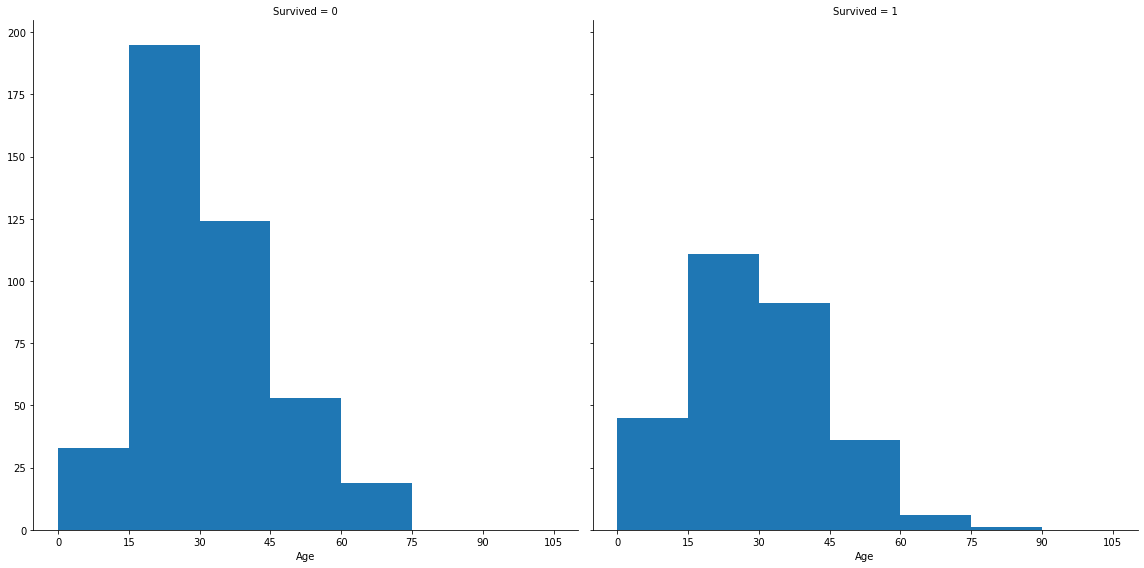

In [60]:
import seaborn as sns
histogram= sns.FacetGrid(train_data, col ='Survived', height=8)
histogram.map(plot.hist, 'Age', bins=range(0, 120, 15))
plot.xticks(range(0, 120, 15))

1.yes,they have high survival rate
2.yes,people above 80 years survived
3.The rate of deaths is higher in first graph from 15-30 ,so mostly they won't survive
4.yes,we should consider and should complete age feature for null values.
5.yes, they are giving sufficient info

## Q12

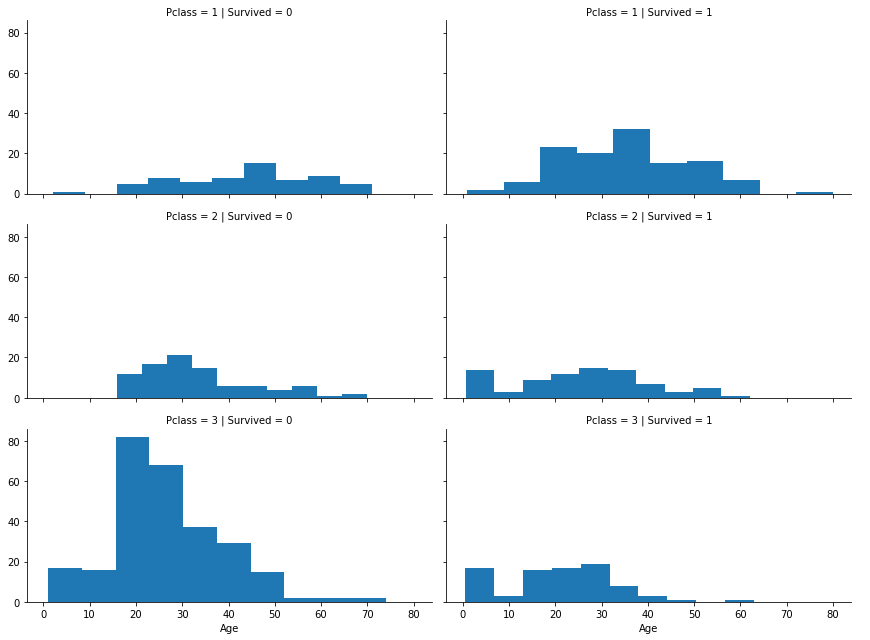

In [68]:
histograms = sns.FacetGrid(train_data, col='Survived', row='Pclass', height=3, aspect=2)
histograms.map(plot.hist, 'Age', bins=10)
histograms.add_legend();

1.Pclass =3 have most passengers but most of them aren't survived
2.yes, they survive 
3.yes, most of them survive
4.yes, they vary   
5.yes , we can consider

## Q13

C:\Users\SHOURYA REDDY\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


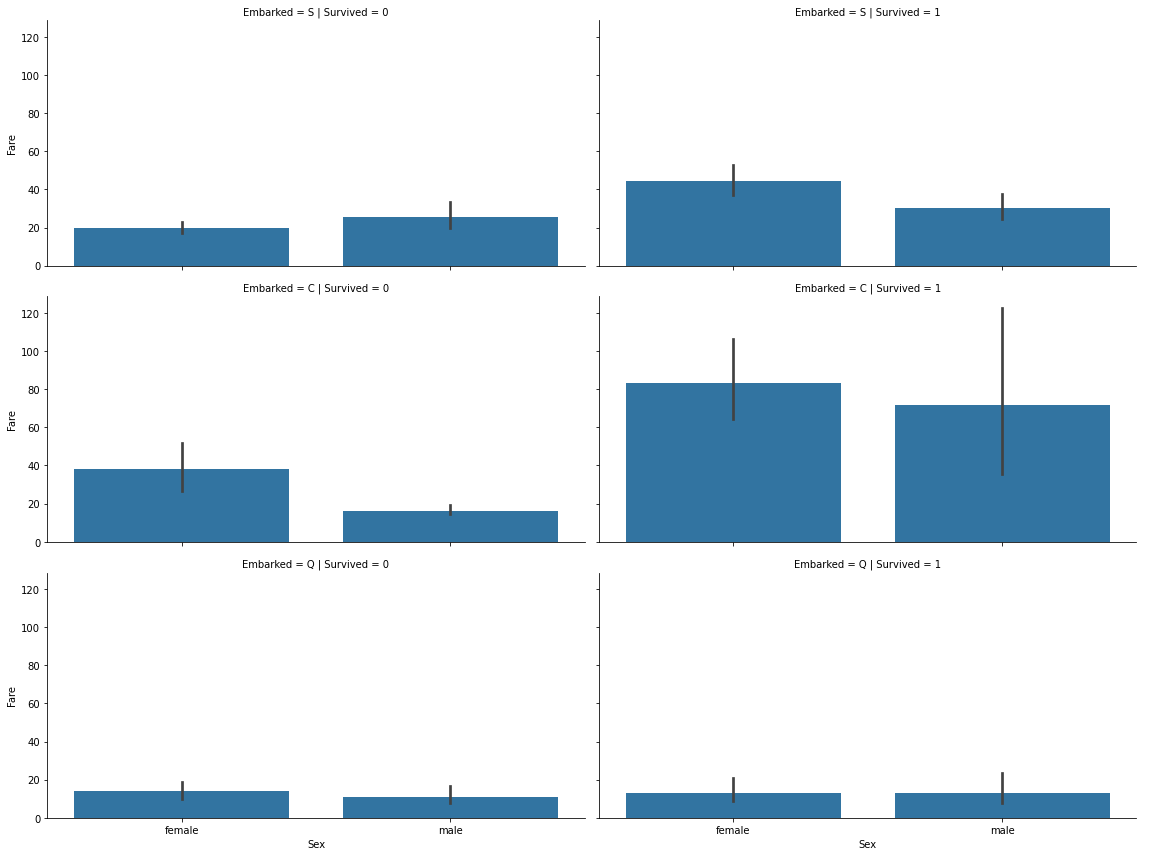

In [71]:
histograms = sns.FacetGrid(train_data, row='Embarked', col='Survived', height=4, aspect=2)
histograms.map(sns.barplot, 'Sex', 'Fare')
histograms.add_legend()

1. Yes ,higher fare people have higher chances
2. we should consider banding

## Q14

In [72]:
train_data['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [77]:
duplicate_rate = ((891-681)/891)*100
print(duplicate_rate)

23.56902356902357


There is around 23.5% duplicate rate and there is no correlation between ticket and survival ,so yeah we can drop the ticket feature

## Q15

In [82]:
apnd_data.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


Cabin feature is incomplete here. From a total of 1309 rows combined set of train and test data only 295 rows have this feature which have null values equal to 1014.Its better to drop the Cabin feature.

## Q16

In [142]:
train_data['gender']=0
train_data.loc[train_data['Sex']=='male',['gender']]=0
train_data.loc[train_data['Sex']=='female',['gender']]=1

In [144]:
train_data.head()
#outputbelow

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,FareBand,gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,3,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0


## Q17

In [145]:
for x in range(len(train_data['Age'])):
    if np.isnan(train_data["Age"][x]) == True:
        train_data.at[x, 'Age']=np.random.uniform(train['Age'].mean(),train['Age'].std())

In [146]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,FareBand,gender
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,NaN,S,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,B42,S,1,2,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.843653,1,2,W./C. 6607,23.45,NaN,S,1,2,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,C,0,2,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,NaN,Q,0,0,0


## Q18

In [147]:
print (train_data['Embarked'].value_counts())
train_data['Embarked'].fillna('S',inplace=True)

S    646
C    168
Q     77
Name: Embarked, dtype: int64


## Q19

In [149]:
mode=train_data['Fare'].mode()
train_data['Fare'].fillna(mode,inplace=True)

## Q20

In [131]:
train_data['FareBand']=0
train_data.loc[(train_data['Fare']>=-0.001) & (train_data['Fare']<7.91),['FareBand']]=0
train_data.loc[(train_data['Fare']>=7.91) & (train_data['Fare']<14.454),['FareBand']]=1
train_data.loc[(train_data['Fare']>=14.454) & (train_data['Fare']<31.0),['FareBand']]=2
train_data.loc[(train_data['Fare']>=31.0) & (train_data['Fare']<512.329),['FareBand']]=3

In [133]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Gender           0
FareBand         0
dtype: int64

In [134]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,FareBand
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,27.775248,0.523008,0.381594,32.204208,0.352413,1.498316
std,257.353842,0.486592,0.836071,13.663563,1.102743,0.806057,49.693429,0.477990,1.121169
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,19.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,25.000000,0.000000,0.000000,14.454200,0.000000,2.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,3.000000


In [136]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,FareBand
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,B42,S,1,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.843653,1,2,W./C. 6607,23.45,NaN,S,1,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,C,0,2
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,NaN,Q,0,0
